> **提示**：欢迎参加“调查数据集”项目！引用段会添加这类提示，来帮助你制定调查方法。在你提交项目之前，你可以浏览一下报告，将这一段删除，以保持报告的简洁性。首先，你需要双击该 Markdown 框(cell)，将标题更改为与数据集和调查相关的标题。

# 项目：未前往就诊的挂号预约

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

> **提示**：在报告的这一部分，你需要首先对已选择进行分析的数据集进行简要的介绍。在这一部分末尾，对你计划在报告过程中探索的问题进行描述。你需要建立至少包含一个因变量和三个自变量的分析报告。如果你不确定要问什么问题，请务必先熟悉数据集、数据集变量以及数据集上下文，以便确定要探索的问题。

> 如果尚未选择和下载数据，务必先进行这一步，再回到这里。如需在这个工作区中处理数据，还需要将其上传到工作区。因此，请单击左上角的 jupyter 图标，回到工作区目录。右上角有一个‘上传’按钮，可以将你的数据文件添加到工作区。然后单击 .ipynb 文件名，回到这里。

本数据集来自Kaggle项目《[Medical Appointment No Shows](https://www.kaggle.com/joniarroba/noshowappointments)》。其中包含超过10万条预约记录，有的预约到时间会按时就诊，有的预约未能按时就诊，则浪费了医疗资源。我们要找出哪些原因与患者不来就诊相关，以便有针对性地改进。

数据描述：

以下数据描述参考该竞赛主页的介绍。

* PatientId - 患者身份标识。
* AppointmentID - 预约号。
* Gender - 两种取值：M/F。女性占更多数，相比于男性他们更在意自己的健康状况。
* ScheduleDay - 原竞赛题也没有详细解释。可能是发起预约的时间。
* AppointmentDay - 原竞赛题也没有详细解释。可能是预约就诊的时间。
* Age - 年龄。
* Neighbourhood - 预约地点。
* Scholarship - 两种取值：Ture/False，已编码为1/0。原竞赛题也没有明确解释意义，但与[Balsa Familia](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia)慈善组织有关，该组织旨在资助巴西贫困家庭儿童的教育和疫苗。故推测此`Scholar`字段可能为，是否接受Balsa Familia的教育资助，或是否受教育。
* Hipertension - 两种取值：Ture/False，已编码为1/0。患者是否有高血压。
* Diabetes - 两种取值：Ture/False，已编码为1/0。患者是否有糖尿病。
* Alcoholism - 两种取值：Ture/False，已编码为1/0。患者是否饮酒。
* Handcap - 两种取值：Ture/False，已编码为1/0。患者是否为残障人士。 
* SMS_received - 两种取值：1/0。是否向患者发送1条或以上的短信。
* No-show - 两种取值：Ture/False，已编码为Yes/No。

本项目将对该数据集做初步的探索，要了解到底有多少患者未能就诊？是否按时来就诊与哪些因素相关？

In [1]:
# 用这个框对你计划使用的所有数据包进行设置
#   导入语句。

# 务必包含一个‘magic word’（带有“%”的***），以便将你的视图
#   与 notebook 保持一致。关于更多信息，请访问该网页：
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

<a id='wrangling'></a>
## 数据整理

> **提示**：在报告的这一部分中载入数据，检查简洁度，然后整理和清理数据集，以便进行分析。请务必将步骤仔细归档，并确定清理决策是否正确。

### 常规属性

In [2]:
# 加载数据并打印几行。进行这几项操作，来检查数据
#   类型，以及是否有缺失数据或错误数据的情况。
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
print('数据集共有{}个样本，{}个变量。'.format(df.shape[0], df.shape[1]))
df.dtypes

数据集共有110527个样本，14个变量。


PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

先检查数据集有样本和变量数，再查看各列的数据类型。可见大多数都是数值型变量，而`Gender`、`ScheduleDay`、`AppointmentDay`、`Neighbourhood`、`No-show`是字符串类型，根据后续分析情况可能需要做一些转换。

In [3]:
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


预览前三个样本，以了解各变量的具体形式。可见其中`patientID`和`AppointmentID`是标识符，而`No-show`是我们分析的因变量，其他均有可能成为影响`No-show`的自变量。

`No-show`可能要转为1/0以便于量化分析。

而其中，`ScheduledDay`和`AppointmentDay`是日期，下一步可以转化为日期格式，并且要确认哪个时间更早。如果`ScheduledDay`是预约发起的时间，则应不晚于`AppointmentDay`。

`Gender`和`Neighbourhood`待下一步确认具体内容有几类，如有必要可以转为独热编码。

In [4]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

查看各列的缺失值数量，结果很好，本数据集中没有缺失值。

In [5]:
print(set(df['Neighbourhood']))
print(len(set(df['Neighbourhood'])))

{'MARUÍPE', 'TABUAZEIRO', 'JOANA D´ARC', 'SEGURANÇA DO LAR', 'PRAIA DO SUÁ', 'BONFIM', 'COMDUSA', 'SÃO PEDRO', 'FRADINHOS', 'SANTA CECÍLIA', 'ITARARÉ', 'NAZARETH', 'BARRO VERMELHO', 'JARDIM CAMBURI', 'SANTA TEREZA', 'SANTA LUÍZA', 'SANTO ANTÔNIO', 'MARIA ORTIZ', 'PARQUE MOSCOSO', 'GRANDE VITÓRIA', 'JABOUR', 'SANTA LÚCIA', 'ILHA DE SANTA MARIA', 'DO CABRAL', 'SÃO CRISTÓVÃO', 'SANTOS DUMONT', 'ANDORINHAS', 'JARDIM DA PENHA', 'SANTO ANDRÉ', 'MATA DA PRAIA', 'ARIOVALDO FAVALESSA', 'MONTE BELO', 'DO MOSCOSO', 'DE LOURDES', 'MÁRIO CYPRESTE', 'JUCUTUQUARA', 'PIEDADE', 'BENTO FERREIRA', 'AEROPORTO', 'ENSEADA DO SUÁ', 'PARQUE INDUSTRIAL', 'FORTE SÃO JOÃO', 'CONSOLAÇÃO', 'CENTRO', 'VILA RUBIM', 'SANTA MARTHA', 'JESUS DE NAZARETH', 'SÃO JOSÉ', 'GOIABEIRAS', 'ROMÃO', 'UNIVERSITÁRIO', 'ILHA DO BOI', 'SANTA CLARA', 'ILHAS OCEÂNICAS DE TRINDADE', 'SOLON BORGES', 'BELA VISTA', 'ANTÔNIO HONÓRIO', 'INHANGUETÁ', 'REPÚBLICA', 'SÃO BENEDITO', 'ILHA DO FRADE', 'SANTA HELENA', 'ILHA DO PRÍNCIPE', 'PONTAL DE 

查看`Neighbourhood`共有几种取值。由于`Neibourhood`的项目较多，可用`len()`查看项目数量，共81项。如果编成独热编码的话，变量数会大增。所以若无回归分析，可以暂时保持原状。

In [6]:
print(df[df.duplicated('PatientId')].shape[0])
print(df[df.duplicated('AppointmentID')].shape[0])

48228
0


检查`PatientId`和`AppointmentID`是否有重复。结果患者有4万余条重复，说明这4万余名患者多次预约；而预约号没有重复，是合理的。

> **提示**：_不应_在每个 notebook 框 (cell) 中进行太多操作。可以自由创建框，来进行数据探索。在这个项目中，可以在初始 notebook 中进行大量探索性操作。不要求对其进行组织，但请务必仔细阅读备注，理解每个代码框的用途。完成分析之后，你可以创建 notebook 副本，在其中去除多余数据，组织好你的每一步分析，从而形成信息连贯、结构紧密的报告。

> **提示**：请务必向你的读者告知你在调查中采取的步骤。在每个代码框或每组相关代码框后面，用 markdown 框对前面的框中的调查结果向读者进行说明。你需要尽量做到这一点，以便读者更好地理解后续框中的内容。

### 格式转换

In [7]:
# 在讨论数据结构和需要解决的任何问题之后，
#   在本部分的第二小部分进行这些清理步骤。
df['No-show-n'] = [1 if x == 'Yes' else 0 for x in df['No-show']]

将`No-show`一列转化为1/0，以便量化分析。

In [8]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

将`ScheduledDay`和`AppointmentDay`转化为日期格式。

### 检测异常值

In [9]:
checkDay = [df['ScheduledDay'][i] <= df['AppointmentDay'][i] for i in range(df.shape[0])]
print(sum(checkDay))
print((df.shape[0]-sum(checkDay))/df.shape[0])
df[[not x for x in checkDay]].head()

71959
0.34894641128412063


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,No-show-n
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


查看`ScheduledDay`是否均早于`AppointmentDay`。结果发现只有71951条记录符合这种情况，而剩下的38568条记录均为`ScheduledDay`晚于`AppointmentDay`，占总样本量的35%。如果这两个字段的意义确如先前的推测，则意味着有1/3的异常值，有点难以置信。但如果不是的话，则这两个字段的意义实在难明。

对此有两种解决方案，一是将那35%的数据视为异常值，剔除；二是暂时忽略这两个字段，先分析其他自变量。

以下分析暂时采取第二种方案。

<a id='eda'></a>
## 探索性数据分析

> **提示**在你完成数据整理和清理之后，现在可以进行探索性数据分析了。你需要计算统计值，创建可视化图表，解决你在一开始的简介部分中提出的研究问题。我们推荐你采用系统化方法。一次只探索一个变量，然后探索变量之间的关系。

### 患者年龄分布如何？

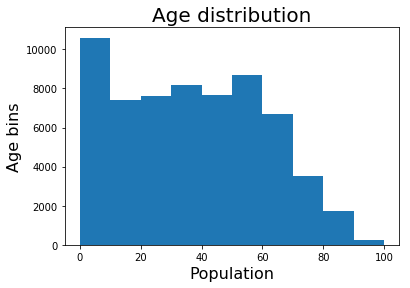

In [10]:
df_age = df[~df.duplicated('PatientId')]['Age']
plt.hist(df_age, bins=range(0, 101, 10))
plt.title('Age distribution', fontsize = 20)
plt.ylabel('Age bins', fontsize = 16)
plt.xlabel('Population', fontsize = 16);

In [11]:
df_age[df_age <= 70].shape[0]/df_age.shape[0]

0.9193566509895825

以每10年为年龄段分界，患者年龄分布在70岁出现明显断层，70岁以前各年龄段人数较多且相差不大，其中最多是0~10岁人群。70岁以后人数急骤减少，且各年龄段人数依次递减。计算70岁以下人数占比，得92%，即大部分患者在70岁以下。

### 未前往就诊的有多少人次？占比多少？

No     88208
Yes    22319
Name: No-show, dtype: int64


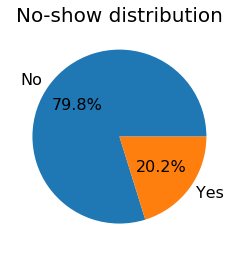

In [12]:
# 用这个代码框和其它代码框探索数据。请务必记得添加
#   Markdown 框，以便记录你的观察和调查结果。
freq_no_show = df['No-show'].value_counts()
print(freq_no_show)
plt.pie(freq_no_show, autopct='%3.1f%%', textprops={'fontsize':16}, labels=freq_no_show.index)
plt.title('No-show distribution', fontsize = 20);

有22319人次未前往就诊，占总预约数的20.2%

### 各预约地点的未就诊率如何分布？最高和最低分别是哪个？

noshow_rate    1.0
Name: ILHAS OCEÂNICAS DE TRINDADE, dtype: float64
noshow_rate    0.0
Name: PARQUE INDUSTRIAL, dtype: float64


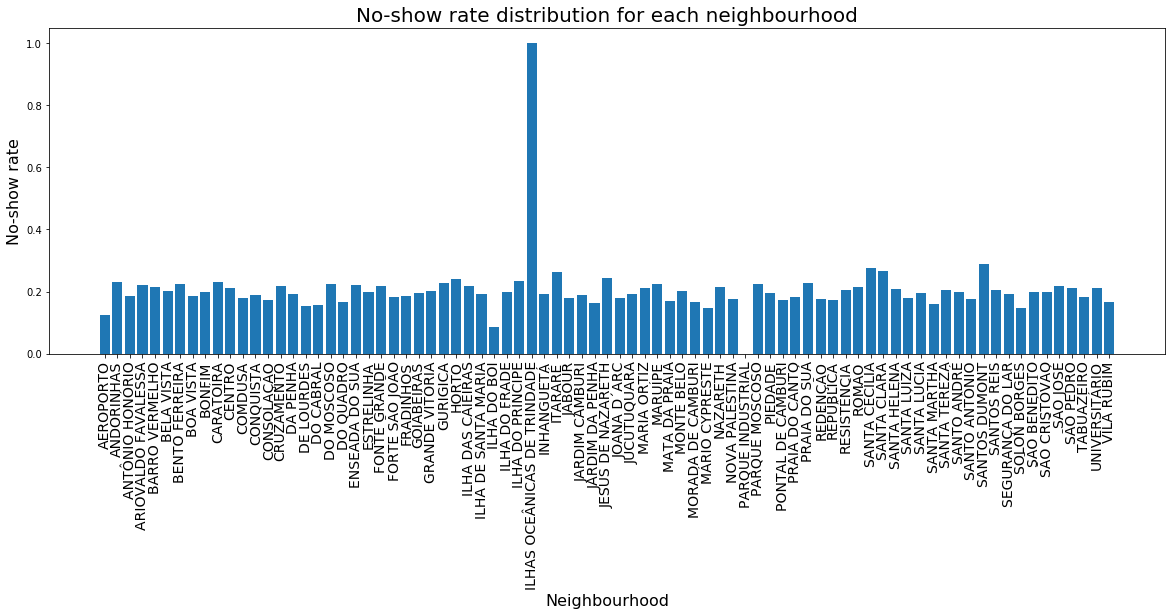

In [13]:
# 用这个代码框和其它代码框探索数据。请务必记得添加
#   Markdown 框，以便记录你的观察和调查结果。
nb_appointments = df.groupby('Neighbourhood').count()['AppointmentID']
nb_noshows = df.groupby('Neighbourhood').sum()['No-show-n']
noshow_rate = pd.DataFrame(nb_noshows/nb_appointments, columns=['noshow_rate'])

plt.figure(figsize=[20, 6])
plt.bar(x = list(noshow_rate.index), height = noshow_rate['noshow_rate'])
pl.xticks(rotation = 90, fontsize = 14)
plt.title('No-show rate distribution for each neighbourhood', fontsize = 20)
plt.ylabel('No-show rate', fontsize = 16)
plt.xlabel('Neighbourhood', fontsize = 16);

max_ns_rate = noshow_rate.sort_values('noshow_rate',axis = 0, ascending = False).iloc[0]
min_ns_rate = noshow_rate.sort_values('noshow_rate',axis = 0, ascending = True).iloc[0]
print(max_ns_rate)
print(min_ns_rate)

各Neighbourhook的未就诊率基本均一，约20%左右，除个别极端值。*ILHAS OCEÂNICAS DE TRINDADE*的未就诊率最高，达100%；*PARQUE INDUSTRIAL*的未就诊率最低，0%。

In [14]:
print(max_ns_rate.name, df[df['Neighbourhood'] == max_ns_rate.name].shape[0])
print(min_ns_rate.name, df[df['Neighbourhood'] == min_ns_rate.name].shape[0])

ILHAS OCEÂNICAS DE TRINDADE 2
PARQUE INDUSTRIAL 1


再查看这两个Neighbourhood的预约记录量，原来两者都很少，*ILHAS OCEÂNICAS DE TRINDADE*只有2条预约记录，而*PARQUE INDUSTRIAL*只有一条，所以可以稳定性并不好。

### 收到短信与未收到短信的患者未就诊率如何？

No-show          No    Yes   ns_rate
SMS_received                        
0             62510  12535  0.200528
1             25698   9784  0.380730


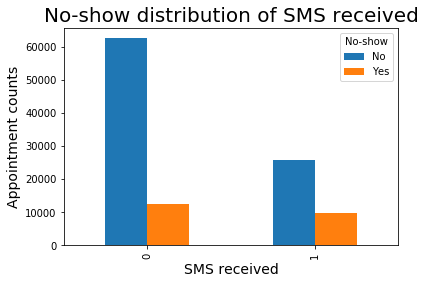

In [15]:
# 请继续探索数据，解决你额外的研究问题。
#   如果有其它问题要调查，
#   请根据需要添加更多标题。
ct = pd.crosstab(df['SMS_received'], df['No-show'])
ct['ns_rate'] = ct['Yes']/ct['No']
print(ct)
ct[['No', 'Yes']].plot.bar(stacked=False)
plt.title('No-show distribution of SMS received', fontsize = 20)
plt.ylabel('Appointment counts', fontsize = 14)
plt.xlabel('SMS received', fontsize = 14);

reference: https://codeday.me/bug/20190416/977422.html

患者如未收到短信，则未就诊率20%，收到1条或以上短信，未就诊率为38%。不过未收到短信的患者基数也更大，共88208人次。

<a id='conclusions'></a>
## 结论

经过部分数据探索，可以发现一些患者特征及未就诊记录的特征。

* 这些患者大多集中在70岁以下。
* 共有20.2%的预约记录未能按时赴约。
* 其中各预约地点的未赶约率约在20%左右，与总体一致；个别预约地点出现极端值，它们的预约数量本来极少，可能不具有代表性。总体而言，预约地点与未就诊的关系很可能并不大。
* 大多数预约人次未收到短信，其中未就诊率20%，与总体一致；收到短信者，未就诊率反而更高，需要进一步分析。

这些探索并不能直接提供未就诊原因的依据，欲探查原因需要更多的相关性或回归分析。

> **提示**：最后，你需要总结自己的调查结果。请确保你了解在探索过程中的局限性。如果尚未进行任何统计检验，不要做出任何统计结论。切记不要根据相关关系贸然推导出因果关系！

> **提示**：如果你对自己的研究成果感到满意，应将其副本保存为 HTML 或 PDF 形式。在导出报告之前请检查一遍，确保报告结构完整，信息连贯。应删除所有类似的“提示”引用段，以保持报告中的简洁度。在提交之前，你还需要查看在课程结尾的项目提交页面中的项目审阅规范。

> 如需将报告导出到工作区，你可以运行下面的代码框。如果正确，会返回代码 0，工作区目录下会生成 .html 文件（单击左上角的 jupyter 图标）。也可以通过 **文件** > **下载为** 子菜单下载 html 报告，然后手动上传到工作区目录。完成之后，可以单击右下角的“提交项目”，来提交你的项目。恭喜你！

In [16]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295